In [396]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import math

In [397]:
#nuskaitykite auto.csv failą į dataframe'ą.

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių
#--------------------------------------------------------------------
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

In [398]:
#nuskaitykite auto.csv failą į dataframe'ą.
# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių

auto = pd.read_csv('NewData/auto.csv', sep='|')[['gamintojas','rida','price','modelis','pagaminimo_data','kuro_tipas']]




def txt_to_sk(tekstas): # Geresne funkcija issikarpyti txt
    try:
        sk = float(tekstas.replace(' ', '').replace('km', ''))
        return sk
    except:
        return -1

def converterRidos(tekstas): # Geresne funkcija issikarpyti txt
    try:
        sk = float(tekstas.replace(' ', '').replace('km', ''))
        return round(math.ceil(sk/15000)*15000) # apvalinam 15k intervalais
    except:
        return 0

auto['Ridos'] = auto['rida'].apply(converterRidos)
ridu_vid = auto['Ridos']

auto['Kaina'] = auto['price'].apply(txt_to_sk)
kainu_vid = auto['Kaina']


auto.head(10).sort_values(by='Ridos')


,gamintojas,rida,price,modelis,pagaminimo_data,kuro_tipas,Ridos,Kaina
6,Dacia,102 122 km,8 000,Lodgy,2013-03,Dyzelinas,105000,8000.0
2,Seat,129 800 km,13 490,Arona,2019-11,Dyzelinas,135000,13490.0
4,Volvo,127 896 km,38 000,XC90,2018-08,Dyzelinas,135000,38000.0
8,BMW,158 486 km,16 190,320,2017-07,Dyzelinas,165000,16190.0
9,Volkswagen,150 869 km,16 490,Passat,2019-01,Dyzelinas,165000,16490.0
3,Skoda,183 000 km,14 650,Octavia Scout,2015-06,Benzinas,195000,14650.0
5,Audi,194 000 km,1 200,80,1987-07,Benzinas,195000,1200.0
1,Mitsubishi,195 405 km,2 700,Outlander,2006,Benzinas,210000,2700.0
7,Skoda,227 937 km,11 990,Octavia,2017-11,Dyzelinas,240000,11990.0
0,BMW,253 000 km,19 500,M5,2005-12,Benzinas,255000,19500.0


In [413]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)

auto_kainaVisuAuto = auto['Kaina'].mean() # Visu automobiliu vid kaina 

autoVid_data = auto.groupby(by='gamintojas').mean(numeric_only=True)

auto_visu_vid_palyg = autoVid_data.query('Kaina > @auto_kainaVisuAuto ')
auto_visu_vid_palyg.head(20).reset_index()




,gamintojas,Ridos,Kaina,Ametai
0,Aston Martin,45000.000000,125000.000000,9.000000
1,BMW,266589.041096,10652.136986,15.221918
2,Dodge,107727.272727,11117.272727,12.727273
3,GAZ,45000.000000,9187.500000,58.250000
4,Hyundai,189375.000000,11999.281250,11.531250
5,Infiniti,186000.000000,12790.000000,11.400000
6,Iveco,256875.000000,16124.000000,9.125000
7,Jaguar,157500.000000,9325.000000,16.500000
8,Jeep,198157.894737,11273.684211,16.473684
9,Kia,188513.513514,10556.594595,11.810811


In [400]:
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių

def autoAmzius(amzius): # funkcija leidzianti suzinoti auto amziu
    return 2024- float(amzius[:4])

auto['Ametai'] = auto['pagaminimo_data'].apply(autoAmzius) # pridedu stulpeli su auto amzium

auto_brangiausi = auto.groupby('gamintojas').mean(numeric_only=True).sort_values(by='Kaina') # 5 brangiausi gamintojai
auto_brangiausi.tail().reset_index()







,gamintojas,Ridos,Kaina,Ametai
0,Maserati,225000.0,34950.000000,7.000000
1,Land Rover,138750.0,40925.000000,6.750000
2,Tesla,110000.0,45666.666667,5.888889
3,Porsche,111000.0,61999.900000,8.200000
4,Aston Martin,45000.0,125000.000000,9.000000


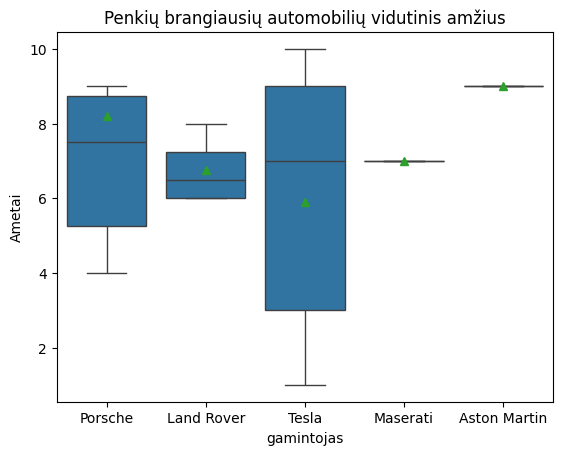

In [401]:
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.


gamintojai = auto_brangiausi.tail().index # Indeksas reikalingas tam, kad pythonas atpazintu lentele

autoTable = sns.boxplot(data= auto.query('gamintojas in @gamintojai'), x='gamintojas', y='Ametai',showmeans=True, showfliers=False)
autoTable.set_title('Penkių brangiausių automobilių vidutinis amžius')
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


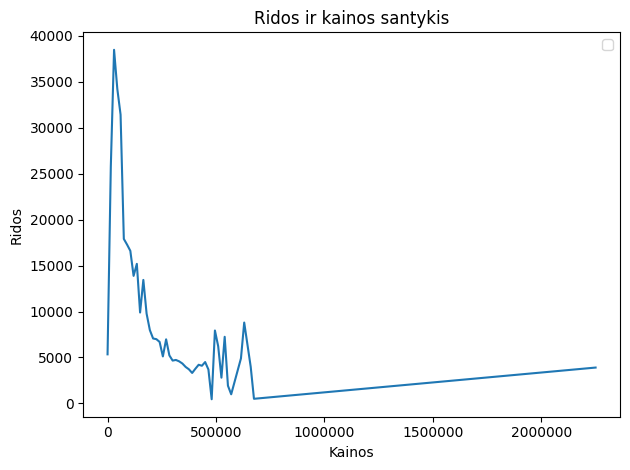

In [421]:
# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
ridos_kainos = auto.groupby('Ridos').mean(numeric_only=True).sort_values(by='Ridos').reset_index()


# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

fig, axis = plt.subplots()
#plotting code:
axis.plot(ridos_kainos['Ridos'], ridos_kainos['Kaina'])


axis.set_xlabel('Kainos')
axis.set_ylabel('Ridos')
axis.set_title('Ridos ir kainos santykis')
axis.tick_params(axis='x')
axis.tick_params(axis='y')
axis.legend(loc='best')
axis.ticklabel_format(style='plain')

fig.tight_layout()

plt.show()

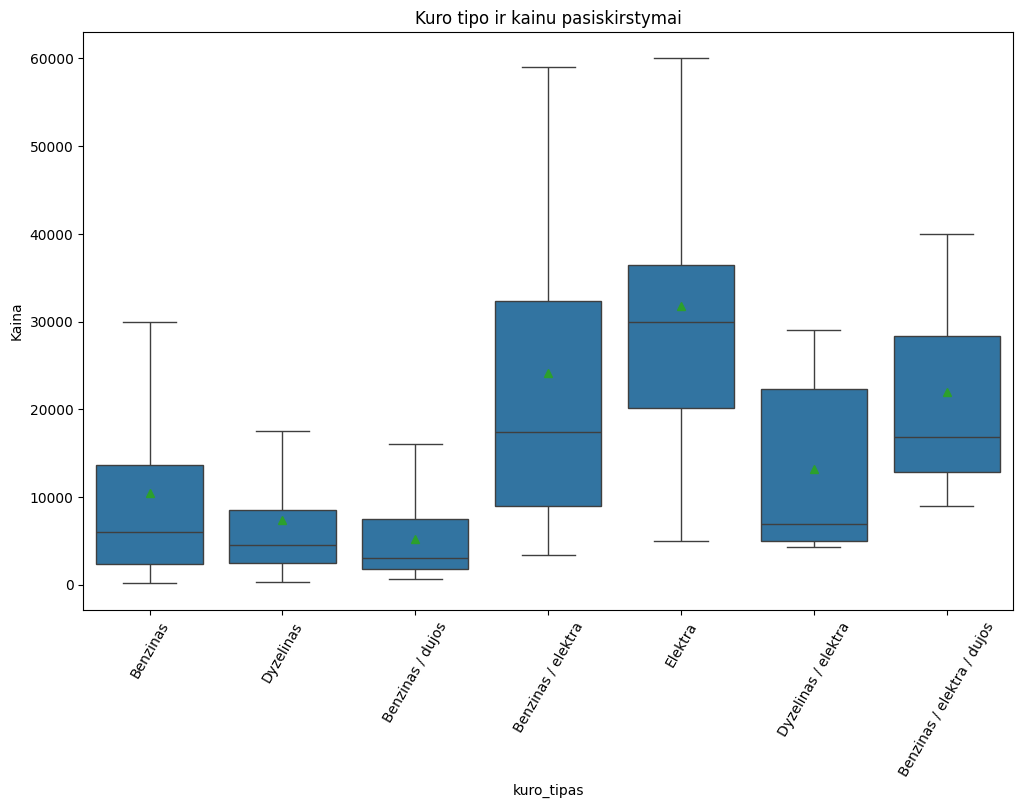

In [409]:
# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
kuras = ['Benzinas','Dyzelinas','Elektra','Benzinas / elektra','Benzinas / dujos','Dyzelinas / elektra','Benzinas / elektra / dujos']

fig, grafikas = plt.subplots(figsize=[12,7.5])
autoTable = sns.boxplot(data= auto.query('kuro_tipas in @kuras'), x='kuro_tipas', y='Kaina',showmeans=True, showfliers=False)
autoTable.set_title('Kuro tipo ir kainu pasiskirstymai')
grafikas.tick_params(axis='x',rotation=60)

plt.show()

# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

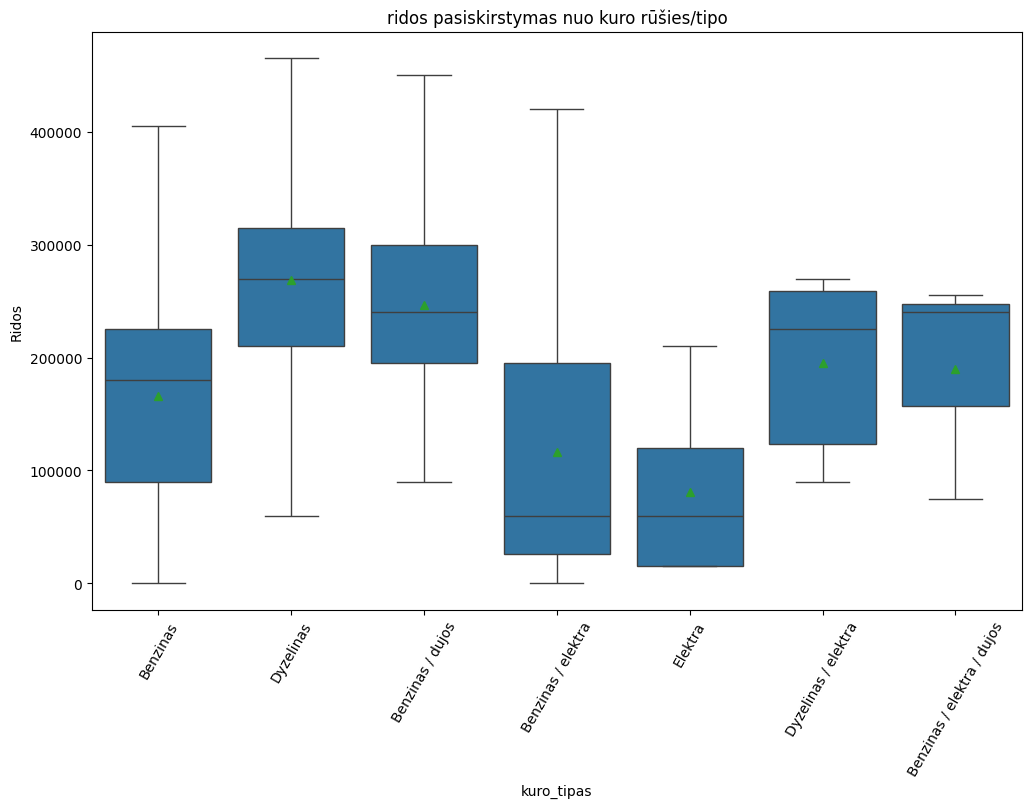

In [404]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
fig, grafikas = plt.subplots(figsize=[12,7.5])
autoTable = sns.boxplot(data= auto.query('kuro_tipas in @kuras'), x='kuro_tipas', y='Ridos',showmeans=True, showfliers=False)
autoTable.set_title('ridos pasiskirstymas nuo kuro rūšies/tipo')
grafikas.tick_params(axis='x',rotation=60)
plt.show()

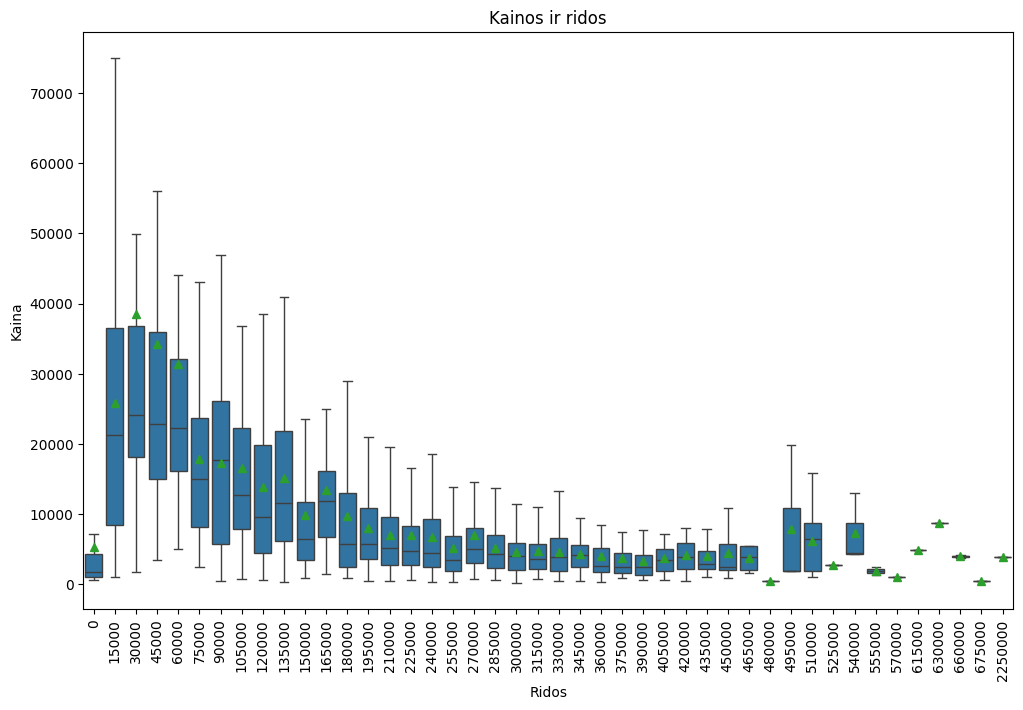

In [405]:
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
fig, grafikas = plt.subplots(figsize=[12,7.5])

autoTable = sns.boxplot(data= auto.sort_values(by='Kaina'), x='Ridos', y='Kaina',showmeans=True, showfliers=False)
autoTable.set_title('Kainos ir ridos')
grafikas.tick_params(axis='x',rotation=90)
autoTable
plt.show()



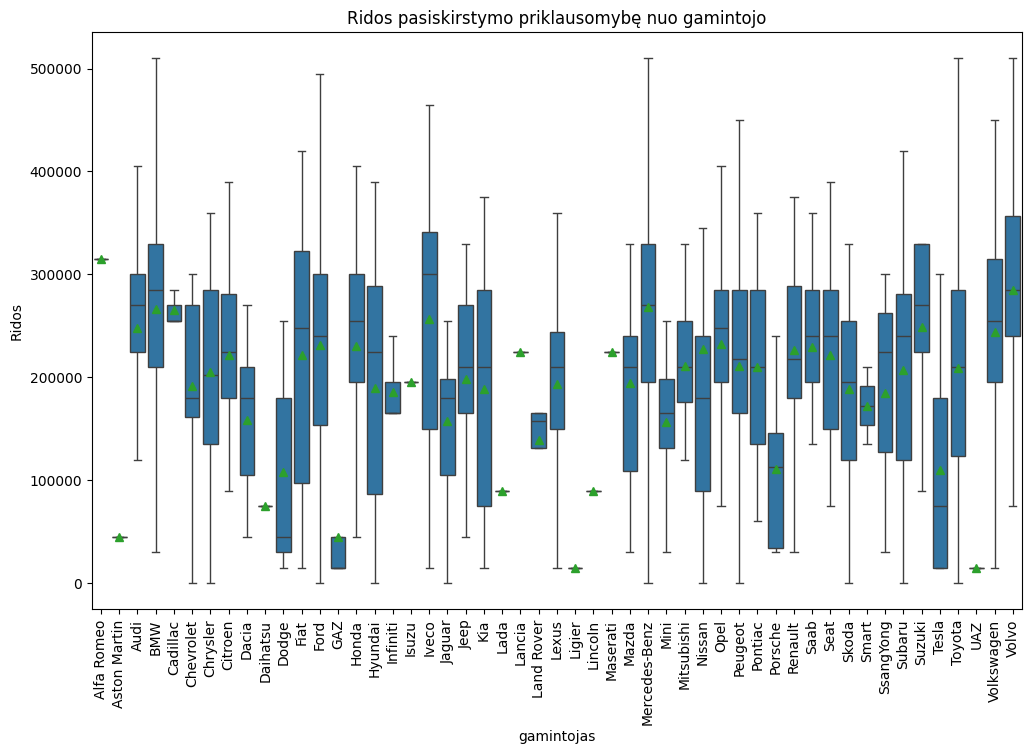

In [406]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

fig, grafikas = plt.subplots(figsize=[12,7.5])

autoTable = sns.boxplot(data= auto.sort_values(by='gamintojas'), x='gamintojas', y='Ridos',showmeans=True, showfliers=False)
autoTable.set_title('Ridos pasiskirstymo priklausomybę nuo gamintojo')
grafikas.tick_params(axis='x',rotation=90)
plt.show()

In [407]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?